In [50]:
import pandas as pd
import numpy as np
import joblib
import os
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import torch

PLOTS_DIR = os.path.join(os.getcwd(), '..', 'latex_pictures')
MODELS_DIR = os.path.join(os.getcwd(), '..', 'models')
MODEL_DIR = os.path.join(MODELS_DIR, '20240214000221')

In [21]:
test_predictions = joblib.load(os.path.join(MODEL_DIR, 'test_predictions.pkl'))
test_targets = joblib.load(os.path.join(MODEL_DIR, 'test_targets.pkl'))
train_loss = joblib.load(os.path.join(MODEL_DIR, 'train_loss.pkl'))
val_f1_scores = joblib.load(os.path.join(MODEL_DIR, 'val_f1_scores.pkl'))
outputs = np.load(os.path.join(MODEL_DIR, 'outputs.pkl'))

In [22]:
test_predictions

[1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0]

In [23]:
test_targets

[0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0

In [24]:
train_loss

[1.2008552854772674,
 0.6809786937530172,
 0.36396745395289454,
 0.19445742080001294,
 0.11161826234284519,
 0.07453752466104661,
 0.0712763922495828,
 0.04931596045078027,
 0.03483074036712694,
 0.030764502189958617,
 0.0967848268265097,
 0.0674694971651724,
 0.04347775380694883,
 0.03308571357137749,
 0.03934459641702273,
 0.059469260754856736,
 0.16361493330983684,
 0.04329992553332486,
 0.024310430406860855,
 0.022760534608971112,
 0.018452348634126415,
 0.01867549572155786,
 0.018294164835986615,
 0.02063339058282789,
 0.01631454627041618,
 0.01808478052550785,
 0.018370437603430687,
 0.015681770267268007,
 0.014485601251642747,
 0.01649459474545366,
 0.017102799459348686,
 0.0162806566593161,
 0.015310972697158177,
 0.014589923898962128,
 0.014437560662574529,
 0.01623029694128439,
 0.012061407387063886,
 0.015961873426790056,
 0.014528206449470981,
 0.012903256642983167,
 0.013038261673021983,
 0.014057775909356744,
 0.014759775365877678,
 0.012669343425585365,
 0.01273227235766

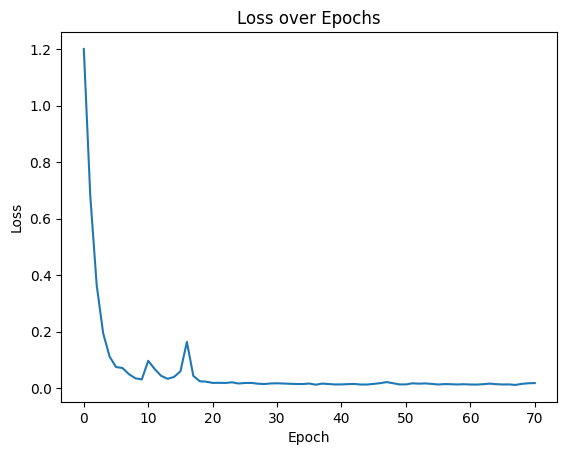

In [25]:
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.show()


In [26]:
val_f1_scores

[0.29310344827586204,
 0.5555555555555556,
 0.625,
 0.7,
 0.7027027027027027,
 0.7027027027027027,
 0.717948717948718,
 0.7058823529411765,
 0.7428571428571428,
 0.7777777777777778,
 0.6842105263157895,
 0.717948717948718,
 0.7567567567567567,
 0.7777777777777778,
 0.7567567567567567,
 0.6511627906976744,
 0.6511627906976744,
 0.7368421052631577,
 0.7777777777777778,
 0.7777777777777778,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7777777777777778,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7999999999999999,
 0.7567567567567567,
 0.7999999999999999,


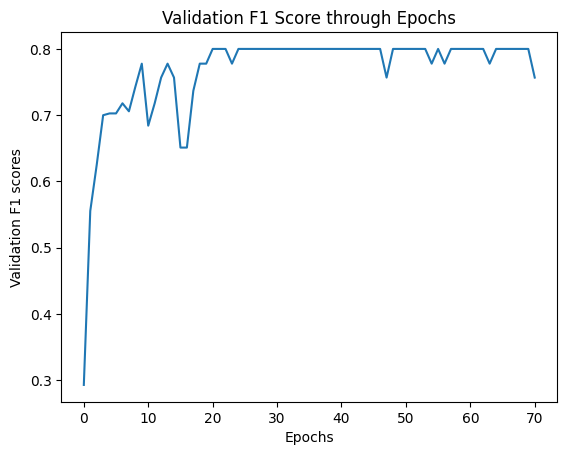

In [27]:
import matplotlib.pyplot as plt

plt.plot(range(len(val_f1_scores)), val_f1_scores)
plt.xlabel('Epochs')
plt.ylabel('Validation F1 scores')
plt.title('Validation F1 Score through Epochs')
plt.show()


In [28]:
from sklearn.metrics import f1_score

f1 = f1_score(test_targets, test_predictions)
print(f1)


0.6666666666666666


In [29]:
outputs

array([[9.37899232e-01],
       [8.80566798e-03],
       [9.96692032e-02],
       [4.20138851e-04],
       [1.81417406e-08],
       [1.51448743e-02],
       [4.27875148e-06],
       [1.48271840e-06],
       [7.17886869e-05],
       [1.28818999e-06],
       [8.02232698e-02],
       [2.84987432e-03],
       [2.23539391e-05],
       [6.44200918e-05],
       [5.45194089e-05],
       [8.03490536e-08],
       [9.93259370e-01],
       [1.59431377e-03],
       [5.94229022e-08],
       [1.16962049e-07],
       [1.40352715e-02],
       [1.82032745e-05],
       [9.72128451e-01],
       [8.63052428e-01],
       [2.57234733e-05],
       [2.12694705e-02],
       [3.08871495e-05],
       [7.64325145e-04],
       [2.38865282e-11],
       [1.12410525e-07],
       [9.68850873e-05],
       [2.92707555e-05],
       [2.28042154e-06],
       [2.81982125e-07],
       [4.81097065e-02],
       [1.10997818e-03],
       [2.17091339e-03],
       [2.28186605e-06],
       [1.64716397e-07],
       [4.23013698e-03],


In [30]:
def calculate_metrics(y_test, y_proba, threshold):
    # Convert probabilities to binary predictions based on threshold
    y_pred_binary = [1 if pred >= threshold else 0 for pred in y_proba]

    # Calculate true positives, false positives, true negatives, false negatives
    tp = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred_binary[i] == 1])
    fp = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred_binary[i] == 1])
    tn = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred_binary[i] == 0])
    fn = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred_binary[i] == 0])

    # Calculate precision, accuracy, recall, true positive rate, false positive rate
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    # f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    f1 = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0

    return precision, accuracy, recall, f1

In [31]:
thresholds = np.linspace(0, 1, 101)
metrics = [calculate_metrics(test_targets, outputs, threshold) for threshold in thresholds]

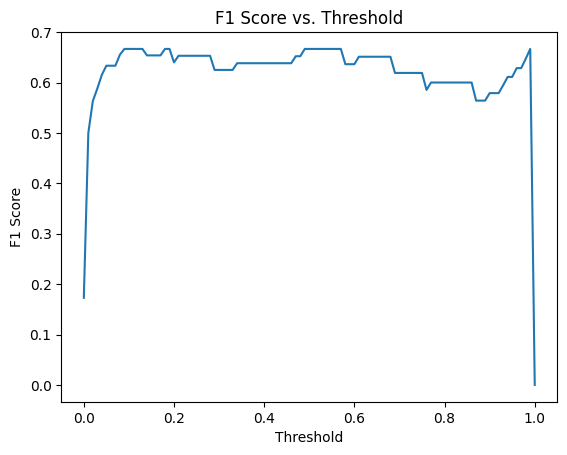

In [32]:
import matplotlib.pyplot as plt

# Extract F1 scores from metrics
f1_scores = [metric[3] for metric in metrics]

# Plot F1 scores over thresholds
plt.plot(thresholds, f1_scores)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold')
plt.show()


In [40]:
def calculate_metrics_multi(y_test, y_proba, threshold):
    # Convert probabilities to binary predictions based on threshold
    # y_pred_binary = [1 if pred >= threshold else 0 for pred in y_proba]

    y_pred_binary = [1 if (2 * pred - 1) >= threshold else 0 if (2 * pred - 1) <= -threshold else 2 for pred in y_proba]

    # Calculate true positives, false positives, true negatives, false negatives
    tp = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred_binary[i] == 1])
    fp = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred_binary[i] == 1])
    tn = sum([1 for i in range(len(y_test)) if y_test[i] == 0 and y_pred_binary[i] == 0])
    fn = sum([1 for i in range(len(y_test)) if y_test[i] == 1 and y_pred_binary[i] == 0])

    # Calculate precision, accuracy, recall, true positive rate, false positive rate
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    # f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    f1 = 2 * tp / (2 * tp + fp + fn) if (2 * tp + fp + fn) > 0 else 0

    return precision, accuracy, recall, f1

In [47]:
T = [0, 0, 0, 1, 1]
Pred_single = [1, 0, 0, 1, 1]
C_50_2 = [2, 2, 0, 2, 1]
C_50_mis = [1, 1, 0, 0, 1]
C_50_0 = [0, 0, 0, 0, 1]

print('precision, accuracy, recall, f1')
for p in [Pred_single, C_50_2, C_50_mis, C_50_0]:
    # Calculate true positive, false positive, true negative, false negative
    TP = sum([1 for i in range(len(T)) if T[i] == 1 and p[i] == 1])
    FP = sum([1 for i in range(len(T)) if T[i] == 0 and p[i] == 1])
    TN = sum([1 for i in range(len(T)) if T[i] == 0 and p[i] == 0])
    FN = sum([1 for i in range(len(T)) if T[i] == 1 and p[i] == 0])

    # Calculate precision, accuracy, recall, true positive rate, false positive rate
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    print(precision, accuracy, recall, f1)
    print()

precision, accuracy, recall, f1
0.6666666666666666 0.8 1.0 0.8

1.0 1.0 1.0 1.0

0.3333333333333333 0.4 0.5 0.4

1.0 0.8 0.5 0.6666666666666666



In [41]:
metrics_multi = [calculate_metrics_multi(test_targets, outputs, threshold) for threshold in thresholds]

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]
[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

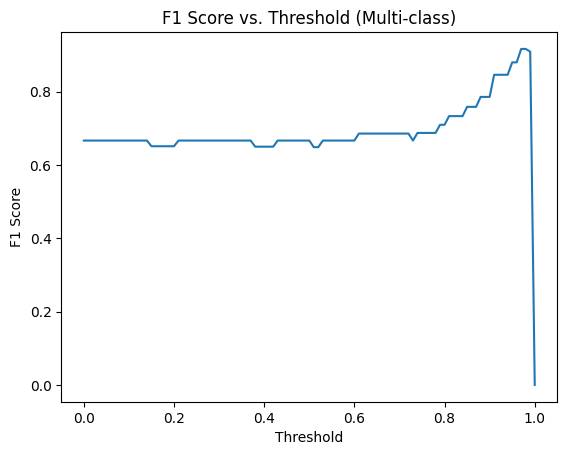

0.6932641152857911


In [42]:
# Extract F1 scores from metrics_multi
f1_scores_multi = [metric[3] for metric in metrics_multi]

# Plot F1 scores over thresholds
plt.plot(thresholds, f1_scores_multi)
plt.xlabel('Threshold')
plt.ylabel('F1 Score')
plt.title('F1 Score vs. Threshold (Multi-class)')
plt.show()

from sklearn.metrics import auc

print(auc(thresholds, f1_scores_multi))


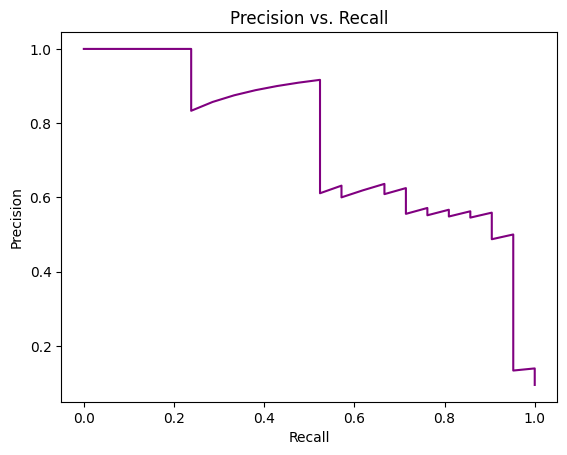

0.7447908492089265


In [53]:
precision, recall, _ = precision_recall_curve(test_targets, outputs)
plt.plot(recall, precision, color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall')
plt.savefig(os.path.join(PLOTS_DIR, 'PR_CNN.png'), bbox_inches='tight')
plt.show()

from sklearn.metrics import auc

print(auc(recall, precision))




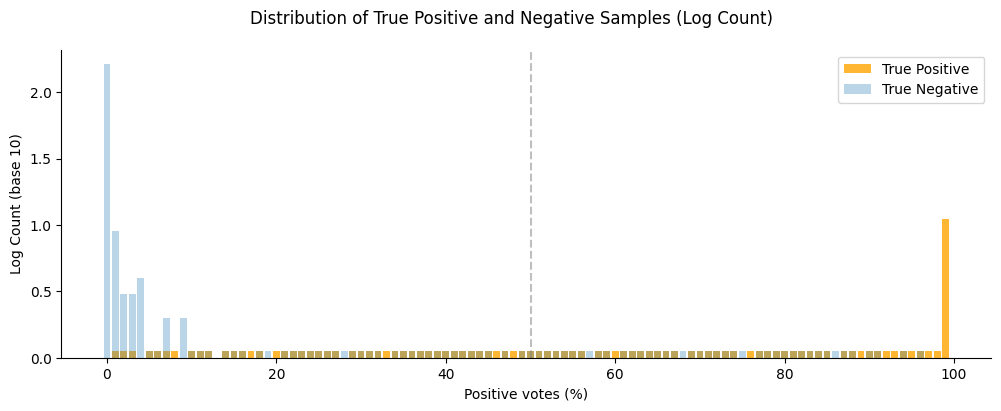

In [64]:
import math

# Calculate true positives and true negatives
true_positives = [outputs[i] for i in range(len(outputs)) if test_targets[i] == 1]
true_negatives = [outputs[i] for i in range(len(outputs)) if test_targets[i] == 0]

# Calculate the log count for true positive and true negative samples
log_true_negative = [math.log10(count) if count > 0 else 0.05 for count in np.histogram(true_negatives, bins=100)[0]]
log_true_positive = [math.log10(count) if count > 0 else 0.05 for count in np.histogram(true_positives, bins=100)[0]]

# Calculate the count for true positive and true negative samples
count_true_negative = np.histogram(true_negatives, bins=100)[0]
count_true_positive = np.histogram(true_positives, bins=100)[0]

# Plot the distribution
plt.figure(figsize=(12, 4))  # Set the figsize to make the graph wider
plt.bar(range(len(log_true_positive)), log_true_positive, alpha=0.8, label='True Positive', color='orange')
plt.bar(range(len(log_true_negative)), log_true_negative, alpha=0.3, label='True Negative')
plt.axvline(x=50, linestyle='--', color='gray', alpha=0.5)  # Add dashed vertical line at 50
plt.xlabel('Positive votes (%)')
plt.ylabel('Log Count (base 10)')
plt.suptitle('Distribution of True Positive and Negative Samples (Log Count)')
plt.legend()

# Remove upper and right border
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.savefig(os.path.join(PLOTS_DIR, f'distribution_cnn.png'), bbox_inches='tight')
plt.show()
